# Pandas DataFrames

**Pandas is a Python library for data manipulation, analysis and display**. Pandas is a very useful package and many things interface to it.  Pandas has two data formats the *Series* and the *DataFrame*. Being honest I (very) rarely use the series, but do use the data frame quite a lot. This is just a brief introduction to them.

DataFrames are a tabular form are a bit like Excel spreadsheets (and you can read/write spreadsheets to/from pandas DataFrames). 

There are many online teaching materials for pandas for example the [w3resources]( https://www.w3resource.com/python-exercises/pandas/index.php) and so this is only to give you a taste.

Lets create a simple DataFrame:



In [1]:
import pandas as pd
# set data as dictionary structure
data={'Name':["Rex","Bruno","Biffa","Queeny","Sheiba","Crusoe"],
     'Breed':["bulldog","labrador","doberman","poodle","labrador","scotty"],
     'Age':[2,4,12,0.5,10,7]}

dogs=pd.DataFrame(data)

display(dogs)



,Name,Breed,Age
0,Rex,bulldog,2.0
1,Bruno,labrador,4.0
2,Biffa,doberman,12.0
3,Queeny,poodle,0.5
4,Sheiba,labrador,10.0
5,Crusoe,scotty,7.0


You should note that the first column is an index, and you can use this to display the ones that you want.

In [2]:
display(dogs[2:4])

,Name,Breed,Age
2,Biffa,doberman,12.0
3,Queeny,poodle,0.5


If you like you can change this index to something more meaningful (not that this is a good example of this)

In [3]:
dogs=pd.DataFrame(data,index=["a","b","c","d","e","f"])
display(dogs["b":"d"])

,Name,Breed,Age
b,Bruno,labrador,4.0
c,Biffa,doberman,12.0
d,Queeny,poodle,0.5


Note that in ths case it displays both the first and the last.

You insert a new column:

In [4]:
dogs["Length"]=[50,100,105,85,100,80]
display(dogs)

,Name,Breed,Age,Length
a,Rex,bulldog,2.0,50
b,Bruno,labrador,4.0,100
c,Biffa,doberman,12.0,105
d,Queeny,poodle,0.5,85
e,Sheiba,labrador,10.0,100
f,Crusoe,scotty,7.0,80


You can select only entries with a given attribute ... say old dogs.

In [5]:
display(dogs[dogs.Age > 6])

,Name,Breed,Age,Length
c,Biffa,doberman,12.0,105
e,Sheiba,labrador,10.0,100
f,Crusoe,scotty,7.0,80


You can even columns that are functions of other columns and pandas does this really quickly. 

In [6]:
dogs["combination"]=dogs.Age*dogs.Length
display(dogs)

,Name,Breed,Age,Length,combination
a,Rex,bulldog,2.0,50,100.0
b,Bruno,labrador,4.0,100,400.0
c,Biffa,doberman,12.0,105,1260.0
d,Queeny,poodle,0.5,85,42.5
e,Sheiba,labrador,10.0,100,1000.0
f,Crusoe,scotty,7.0,80,560.0


You can calculate things like the correlation and covariance matrices

In [7]:
display(dogs.corr())
display(dogs.cov())

,Age,Length,combination
Age,1.000000,0.616419,0.990125
Length,0.616419,1.000000,0.689197
combination,0.990125,0.689197,1.000000


,Age,Length,combination
Age,20.641667,57.166667,2193.291667
Length,57.166667,416.666667,6859.166667
combination,2193.291667,6859.166667,237721.041667


## Displaying data


It is possible to display your DataFrame content quite easily

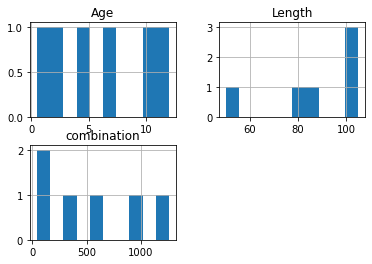

In [8]:
import numpy as np
import scipy as sp
import pylab as pl

histogram=dogs.hist()


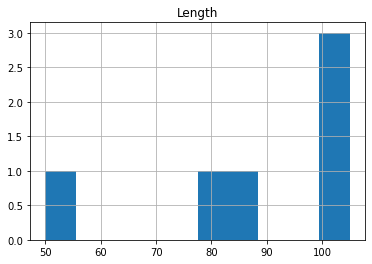

In [9]:
h1=dogs.hist(column="Length")

array([[<AxesSubplot:title={'center':'Length'}>]], dtype=object)

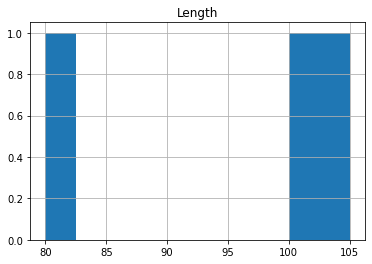

In [10]:
dogs[dogs.Age>6].hist(column="Length")

One particularly useful way is as a scatter plot

<AxesSubplot:xlabel='Age', ylabel='Length'>

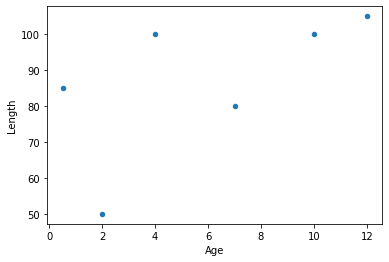

In [11]:
dogs.plot(kind="scatter",x="Age",y="Length")
#dogs.plot(kind="scatter",x="Age",y="Length",alpha=0.05) if you have larger numbers then having a value for alpha can make it easier to see.

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Length', ylabel='Age'>,
        <AxesSubplot:xlabel='combination', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Length'>,
        <AxesSubplot:xlabel='Length', ylabel='Length'>,
        <AxesSubplot:xlabel='combination', ylabel='Length'>],
       [<AxesSubplot:xlabel='Age', ylabel='combination'>,
        <AxesSubplot:xlabel='Length', ylabel='combination'>,
        <AxesSubplot:xlabel='combination', ylabel='combination'>]],
      dtype=object)

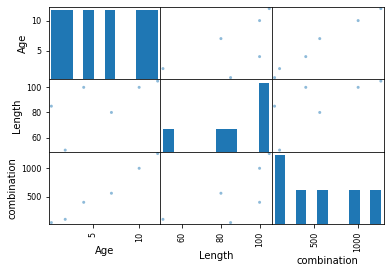

In [12]:
import pandas.plotting as pdp
pdp.scatter_matrix(dogs)

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Length', ylabel='Age'>,
        <AxesSubplot:xlabel='combination', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Length'>,
        <AxesSubplot:xlabel='Length', ylabel='Length'>,
        <AxesSubplot:xlabel='combination', ylabel='Length'>],
       [<AxesSubplot:xlabel='Age', ylabel='combination'>,
        <AxesSubplot:xlabel='Length', ylabel='combination'>,
        <AxesSubplot:xlabel='combination', ylabel='combination'>]],
      dtype=object)

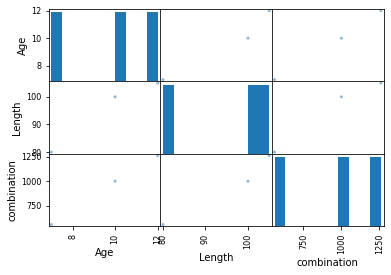

In [13]:
pdp.scatter_matrix(dogs[dogs.Age>6])

<div style="background-color:#C2F5DD">

## Exercise

The purpose of this exercise is to get you to play around with pandas DataFrame and to consolidate the knowledge that you already have. 

* Generate 5 samples 100,000 correlated (you can choose whatever covariance matrix that you like) random numbers distributed according to Gaussian distributions. 

* Read these into a DataFrame

* Creat a 6 column in your DataFrame that the second column plus the 4th column

* Verify that the covariance (and correlation) matrices are what you would expect 

* Display your data

## Reading data from files

You can read data from all sorts of files (csv, excel, ...). Sometimes (especially with csv) you have to be careful with the separator

In [14]:
students=pd.read_excel(r'student-por.xlsx')

In [15]:
display(students)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


<div style="background-color:#C2F5DD">

## Exercise 

These data are taken from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance#)

Read the description of student data, read in the data set. Then work together as a group to analyse these data. What are the most important factors that determine a students scores? What are the least important? What other correlations do you see here (look at hings that aren't simply numerical as well as those that are). 